In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data=pd.read_csv('..\\datasets\\21-dynamic-pricing\\Cleaned_dataset.csv')
#https://www.kaggle.com/code/sridharstreaks/airfare-price-prediction/input

In [12]:
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [14]:
data['Date_of_journey']=pd.to_datetime(data['Date_of_journey'])
data.set_index('Date_of_journey',inplace=True)
data['hours']=data['Duration_in_hours'].astype('int')

In [5]:
data.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
hours                0
dtype: int64

C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

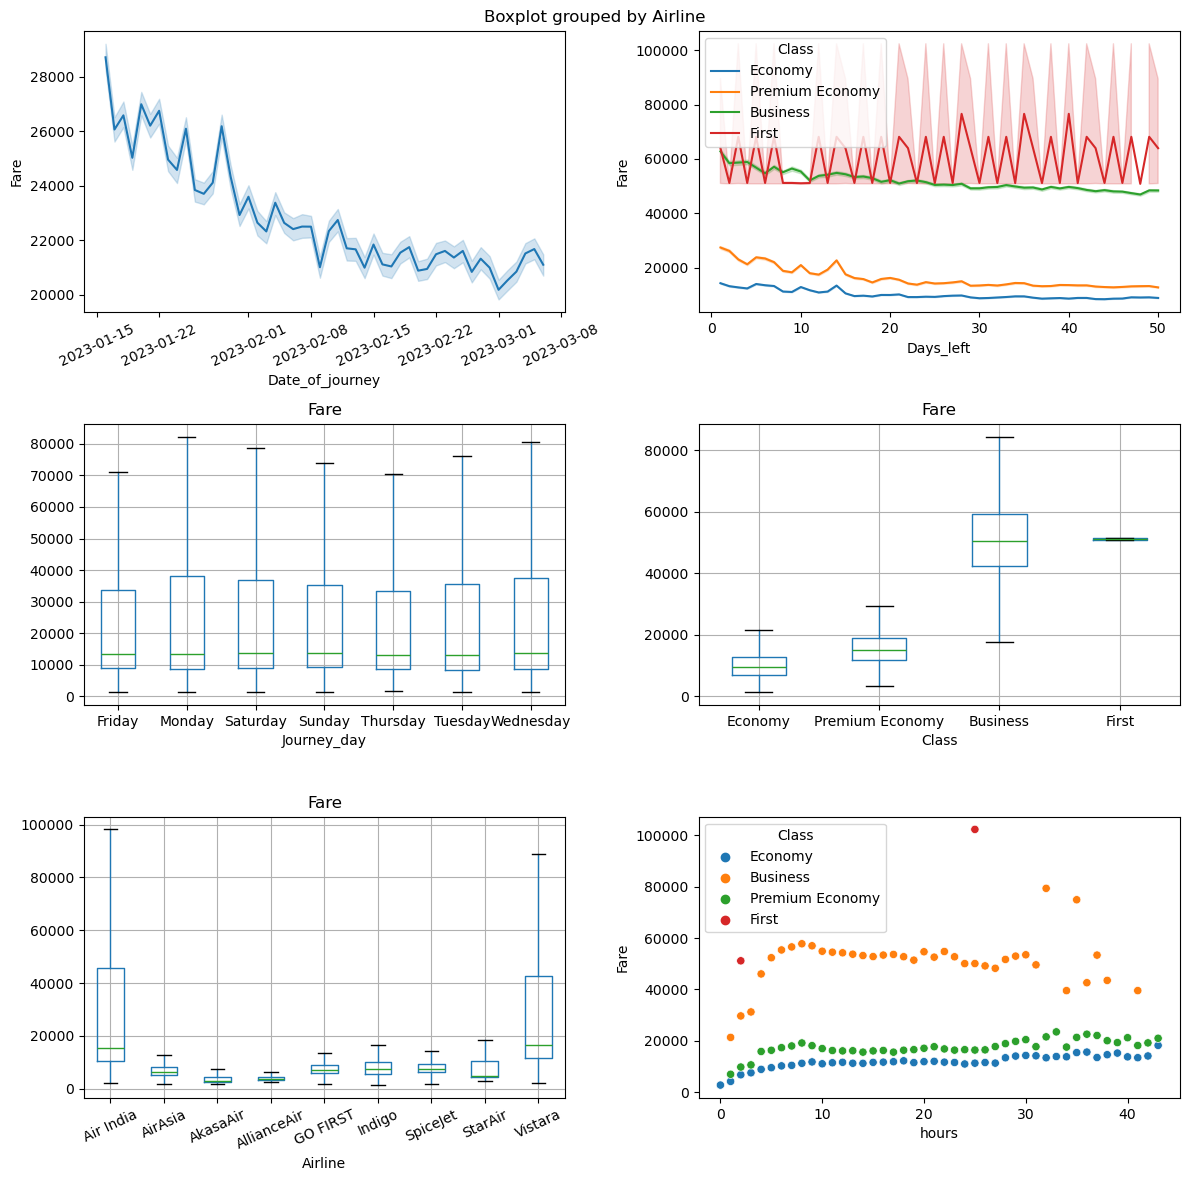

In [111]:
fare_mean=data['Fare'].resample('d').mean()
fare_div=data['Fare'].resample('d').std()
fig,axes=plt.subplots(ncols=2,nrows=3,figsize=(12,12))

sns.lineplot(data,x=data.index,y='Fare',ax=axes[0,0])
axes[0,0].tick_params('x',labelrotation=25)
sns.lineplot(data,x='Days_left',y='Fare',hue='Class',ax=axes[0,1])

data.boxplot(ax=axes[1,0],column='Fare',by='Journey_day',sym='')

classes=['Economy','Premium Economy','Business','First']
data.boxplot(ax=axes[1,1],column='Fare',by='Class',positions=[2,0,3,1],sym='')

data.boxplot(ax=axes[2,0],column='Fare',by='Airline',sym='')
axes[2,0].tick_params('x',labelrotation=25)

sns.scatterplot(data.groupby(['hours','Class'])[['Fare']].mean(),x='hours',y='Fare',hue='Class',ax=axes[2,1])


plt.tight_layout()

dont think this dataset is good for dynamic pricing since there is not supply and demand data here